In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv('instagram_reach.csv', index_col=1)

In [5]:
dataset.head()

,Unnamed: 0,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
S.No,,,,,,,
1,0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
2,1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
3,2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
4,3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
5,4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [7]:
dataset_new = dataset[['Followers','Time since posted','Likes']]
dataset_new.head()

,Followers,Time since posted,Likes
S.No,,,
1,1600,11 hours,139
2,880,2 hours,23
3,255,2 hours,25
4,340,3 hours,49
5,304,3 hours,30


In [8]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 25
Data columns (total 3 columns):
Followers            100 non-null int64
Time since posted    100 non-null object
Likes                100 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.1+ KB


In [9]:
dataset.describe()

,Unnamed: 0,Followers,Likes
count,100.000000,100.00000,100.00000
mean,8.940000,961.96000,46.48000
std,6.639064,1014.62567,55.08698
min,0.000000,11.00000,8.00000
25%,4.000000,252.75000,19.00000
50%,8.000000,612.00000,29.00000
75%,12.250000,1197.00000,46.00000
max,26.000000,4496.00000,349.00000


In [14]:
dataset_new['TSP'] = dataset_new['Time since posted'].map(lambda x:x.rstrip('hours'))
dataset_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Followers,Time since posted,Likes,TSP
S.No,,,,
1,1600,11 hours,139,11
2,880,2 hours,23,2
3,255,2 hours,25,2
4,340,3 hours,49,3
5,304,3 hours,30,3


In [15]:
dataset_new['TSP'] = dataset_new['TSP'].astype('int')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 25
Data columns (total 4 columns):
Followers            100 non-null int64
Time since posted    100 non-null object
Likes                100 non-null int64
TSP                  100 non-null int32
dtypes: int32(1), int64(2), object(1)
memory usage: 3.5+ KB


In [19]:
dataset_new.drop('Time since posted',axis = 1)

,Followers,Likes,TSP
S.No,,,
1,1600,139,11
2,880,23,2
3,255,25,2
4,340,49,3
5,304,30,3
...,...,...,...
19,614,31,3
21,450,42,3
22,182,10,3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


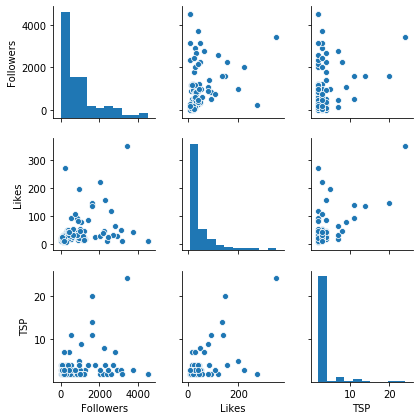

In [20]:
sns.pairplot(data = dataset_new, size = 2)

In [22]:
correlation = dataset_new.iloc[:,:-1].corr()
print(correlation)

           Followers     Likes
Followers   1.000000  0.266218
Likes       0.266218  1.000000


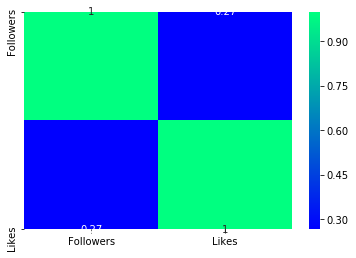

In [23]:
sns.heatmap(correlation, annot = True, cmap = 'winter')

In [50]:
x = dataset_new[['Followers','TSP']]
y = dataset_new['Likes']
y = y.astype('int')

In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 2)

In [58]:
from sklearn.linear_model import LinearRegression

LR  = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error

print("The MSE : ", round(mean_squared_error(y_pred,y_test),2))

The MSE :  1076.03


In [60]:
from pickle import dump
file = 'model.h5'
dump(LR,open(file,'wb'))

In [61]:
from pickle import load
x = load(open('model.h5','rb'))

In [63]:
y = x.predict([[3000,10]])
print('The number of Likes for 300 followers of TSP 10: ',int(round(y[0])),'likes')

The number of Likes for 300 followers of TSP 10:  133 likes
